In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(
    '../data/processed/job_offers.csv',
    sep=';',
    encoding='UTF-8')
df.head()

,name,company,technology,job,location_city,location_country,salary_low,salary_high,salary_currency,salary_avg,is_senior
0,ux/ui designer,HL Tech,NaN,data analyst,warszawa,POL,6500,9500,PLN,8000.0,0
1,power bi data analyst,Devire,NaN,data analyst,warszawa,POL,13440,16800,PLN,15120.0,0
2,data analyst,IIIT,NaN,data analyst,warszawa,POL,8000,12000,PLN,10000.0,0
3,senior data analyst,Devire,NaN,data analyst,zdalna,NaN,16800,20160,PLN,18480.0,1
4,office manager,Prime Force,NaN,data analyst,warszawa,POL,3500,6500,PLN,5000.0,0


job
data analyst      28
data engineer     71
data scientist    18
dtype: int64


<AxesSubplot:xlabel='job'>

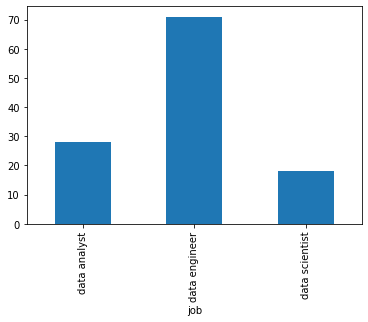

In [4]:
job_offers = df.groupby(by=['job']).size()

print(job_offers)
job_offers.plot.bar()

location_city  job           
białystok      data engineer      2
budapest       data analyst       2
               data engineer      4
gdańsk         data analyst       2
               data scientist     2
gliwice        data analyst       1
katowice       data engineer      2
kraków         data analyst       1
               data engineer      4
robakowo       data analyst       1
warszawa       data analyst      10
               data engineer     23
               data scientist     5
wrocław        data engineer      3
               data scientist     1
zdalna         data analyst      11
               data engineer     33
               data scientist     9
łódź           data scientist     1
dtype: int64


<AxesSubplot:xlabel='location_city,job'>

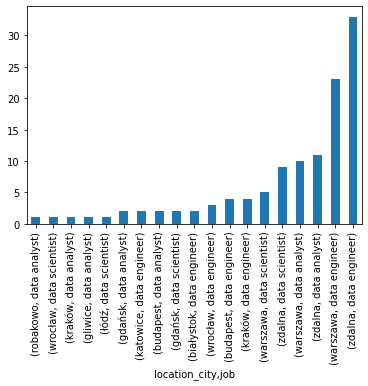

In [5]:
offers_by_city = df.groupby(by=['location_city', 'job']).size()

print(offers_by_city)
offers_by_city.sort_values().plot.bar()

                  salary_avg  count
job                                
data analyst    13456.285714     28
data scientist  16770.222222     18
data engineer   18330.577465     71


array([[<AxesSubplot:title={'center':'salary_avg'}, xlabel='job'>,
        <AxesSubplot:title={'center':'count'}, xlabel='job'>]],
      dtype=object)

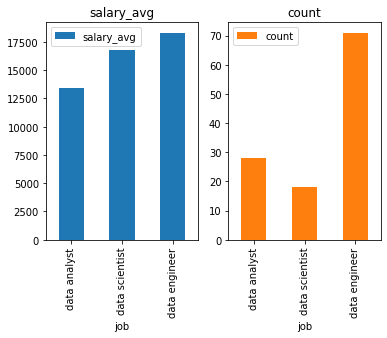

In [6]:
offer_salary = df.groupby(by=['job']).agg({'salary_avg': 'mean', 'name': 'count'})
offer_salary.sort_values(by=['salary_avg'], inplace=True)
offer_salary.rename(columns={'name':'count'}, inplace=True)

print(offer_salary)
offer_salary.plot(subplots=True, layout=(1, 2), kind='bar')

In [7]:
offer_salary_by_city = df.groupby(by=['location_city']).agg({'salary_avg': 'mean', 'name': 'count'})
offer_salary_by_city.sort_values(by=['salary_avg'], inplace=True)
offer_salary_by_city.rename(columns={'name':'count'}, inplace=True)

offer_salary_by_city

,salary_avg,count
location_city,,
gliwice,7000.000000,1
łódź,8000.000000,1
robakowo,9500.000000,1
budapest,13028.750000,6
kraków,15544.000000,5
białystok,16000.000000,2
warszawa,16150.789474,38
wrocław,17325.000000,4
gdańsk,17732.500000,4


<AxesSubplot:xlabel='location_city'>

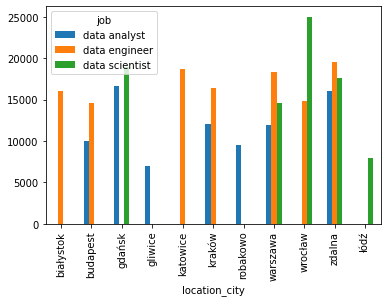

In [8]:
df.pivot_table(index='location_city', columns='job', values='salary_avg').plot(kind='bar')

In [9]:
salary_by_senior = df.groupby(by=['job', 'is_senior']).agg({'salary_avg': 'mean', 'name': 'count'})
salary_by_senior

salary_avg  name
job            is_senior                    
data analyst   0          12770.666667    24
               1          17570.000000     4
data engineer  0          17933.836364    55
               1          19694.375000    16
data scientist 0          16464.923077    13
               1          17564.000000     5